In [19]:
import numpy as py
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import re
from bs4 import BeautifulSoup as bs
import requests
plt.style.use("seaborn-deep")

In [18]:
df = pd.read_csv('lastfm.csv')

dias_mas_escuchados = df.iloc[:,3].str[0:11].value_counts() #FORMATO 28 Sep 2022
dia = df.iloc[:,3].str[0:2].value_counts()
mes = df.iloc[:,3].str[3:6].value_counts()
anio = df.iloc[:,3].str[7:11].value_counts()

07 Feb 2022    260
04 Feb 2022    236
18 Jan 2022    214
10 Feb 2022    208
11 Feb 2022    203
              ... 
25 Jan 2019      1
11 Jun 2022      1
12 Jun 2022      1
15 Sep 2018      1
28 Sep 2022      1
Name: 28 Sep 2022 06:59, Length: 1626, dtype: int64


In [16]:
df = pd.read_csv('lastfm.csv')
df.columns=['artista', 'album', 'cancion', 'fecha']
print(df.columns)
print(len(df))


Index(['artista', 'album', 'cancion', 'fecha'], dtype='object')
86699


37
5.065673385918784
0    1
dtype: int64
2.0
Permanating                         301
May 16                              249
Por la mañana temprano              167
First Date                          166
Annapurnas                          163
Ikebukuro Sunshine                  163
For Fiona                           151
Podría Ser Peor                     137
Los Angeles Is Burning              129
E Dagger                            128
Looking Down The Barrel Of Today    127
I'm the One                         127
I Must Be Hateful                   125
Firth Of Fifth - Remastered 2008    125
Yo controlo                         122
Mercy Me                            121
Punk Rock Song                      120
Intrasport                          119
I Really Wish I Hated You           118
Bizarre Love Triangle               118
Name: cancion, dtype: int64
17115


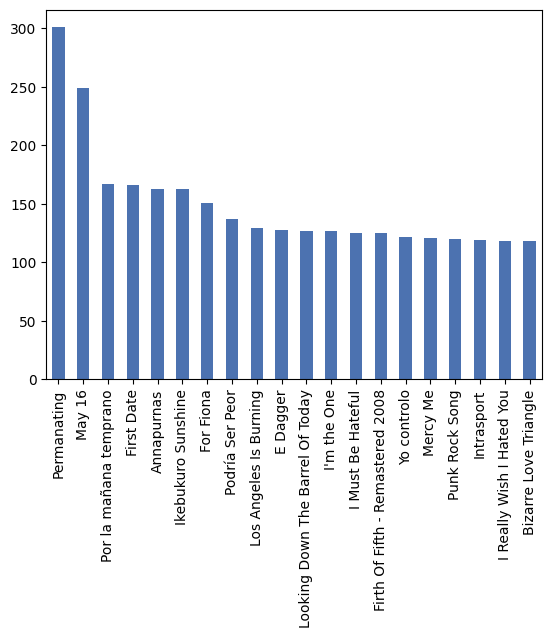

In [6]:
#COSAS CON CANCIONES

#N de escuchas de una cancion
from tkinter import Grid


cancion= 'Superbug'
print(list(df.cancion).count(cancion))


estadisticos_canciones = df['cancion'].value_counts(dropna=False)

#LA MEDIA DE ESCUCHAS DE CADA CANCIÓN
print(estadisticos_canciones.mean())

#LA MODA DE ESCUCHAS DE CADA CANCIÓN 
print(estadisticos_canciones.mode())

#LA MEDIANA DE ESCUCHAS DE CADA CANCIÓN 
print(estadisticos_canciones.median())

#PRIMERAS 20 CANCIONES
los_20_artistas = round(df['cancion'].value_counts(normalize = False),3).head(20)
print(los_20_artistas)
los_20_artistas.plot(kind="bar", grid=False); 
plt.savefig('outputs/cancion.png')

#TOTAL DE CANCIONES DISTINTAS ESCUCHADAS
print(len(df['cancion'].value_counts(dropna=False)))

0
11.640574650912997
0    1
dtype: int64
2.0
7448


c:\Users\Andrés\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "grid" which is no longer supported as of 3.3 and will become an error in 3.6


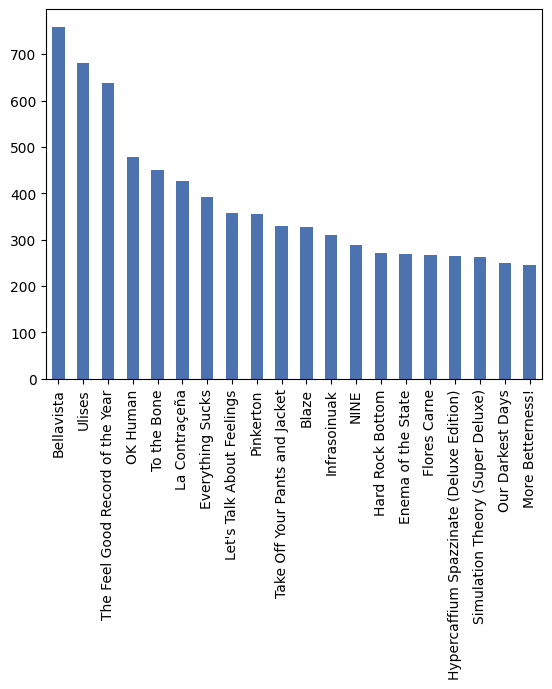

In [7]:
#COSAS CON GRUPOS

#N de escuchas de un grupo
album = "NINE"
print(list(df.artista).count(album))


estadisticos_album = df['album'].value_counts(dropna=False)

#LA MEDIA DE ESCUCHAS DE CADA GRUPO
print(estadisticos_album.mean())

#LA MODA DE ESCUCHAS DE CADA GRUPO 
print(estadisticos_album.mode())

#LA MEDIANA DE ESCUCHAS DE CADA GRUPO 
print(estadisticos_album.median())

#TOTAL DE GRUPOS DISTINTOS ESCUCHADOS
print(len(df['album'].value_counts(dropna=False)))

#PRIMEROS 20 ARTISTAS
los_20_albums = round(df['album'].value_counts(normalize = False),3).head(20)
#print(los_20_albums)
los_20_albums.plot(kind="bar"); 
plt.savefig('outputs/albums.jpg', grid=False)

#SUMA ACUMULADA PRIMEROS N ARTISTAS
#N=59
#print(round(df['album'].value_counts(normalize = True)*100,3).head(N).sum())


1915
31.344540853217644
0    1
dtype: int64
2.0
2766
Bad Religion                        2.209
Viva Belgrado                       2.171
No Use for a Name                   2.073
Weezer                              2.059
Lagwagon                            1.845
Steven Wilson                       1.609
blink-182                           1.496
King Gizzard & The Lizard Wizard    1.458
Descendents                         1.360
Muse                                1.316
Warcry                              1.126
Millencolin                         1.062
Porcupine Tree                      1.045
Queens of the Stone Age             1.027
H2O                                 0.973
Zeal & Ardor                        0.947
Opeth                               0.887
Anathema                            0.878
Berri Txarrak                       0.777
Dream Theater                       0.768
Name: artista, dtype: float64
46.907


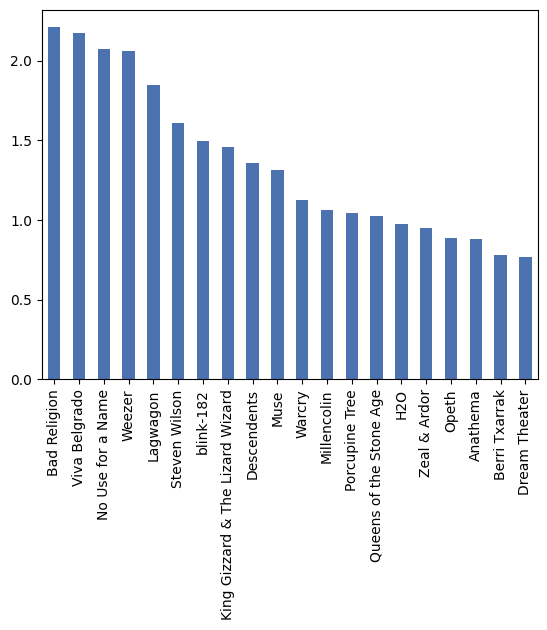

In [8]:
#COSAS CON DISCOS

#N de escuchas de un grupo
from dis import disco


disco = "Bad Religion"
print(list(df.artista).count(disco))


estadisticos_artista = df['artista'].value_counts(dropna=False)

#LA MEDIA DE ESCUCHAS DE CADA GRUPO
print(estadisticos_artista.mean())

#LA MODA DE ESCUCHAS DE CADA GRUPO 
print(estadisticos_artista.mode())

#LA MEDIANA DE ESCUCHAS DE CADA GRUPO 
print(estadisticos_artista.median())

#TOTAL DE GRUPOS DISTINTOS ESCUCHADOS
print(len(df['artista'].value_counts(dropna=False)))

#PRIMEROS 20 ARTISTAS
los_20_artistas = round(df['artista'].value_counts(normalize = True)*100,3).head(20)
print(los_20_artistas)
los_20_artistas.plot(kind="bar", grid=False); 
plt.savefig('outputs/discos.jpg')

#SUMA ACUMULADA PRIMEROS N ARTISTAS
N=59
print(round(df['artista'].value_counts(normalize = True)*100,3).head(N).sum())


   hora  escuchas
15   00      2356
18   01      1153
20   02       378
21   03       274
22   04       261
23   05       255
19   06       643
17   07      1156
16   08      2278
11   09      3887
4    10      6396
1    11      7441
6    12      5346
8    13      4187
5    14      5423
2    15      7180
0    16      8231
3    17      6979
7    18      5296
12   19      3430
14   20      2795
13   21      3299
9    22      4110
10   23      3945
   dia  escuchas
24  01      2569
19  02      2756
13  03      2898
16  04      2878
14  05      2883
7   06      2992
3   07      3139
22  08      2638
8   09      2975
18  10      2831
20  11      2754
29  12      2336
28  13      2354
27  14      2429
26  15      2512
12  16      2902
23  17      2625
15  18      2880
4   19      3101
10  20      2908
6   21      3069
0   22      3367
1   23      3201
17  24      2831
11  25      2905
9   26      2949
5   27      3076
2   28      3193
21  29      2710
25  30      2569
30  31      1469
    me

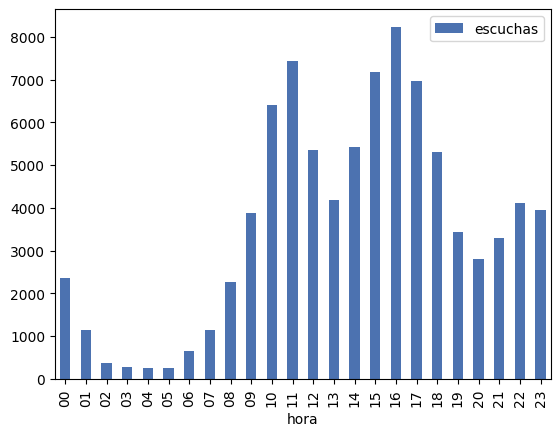

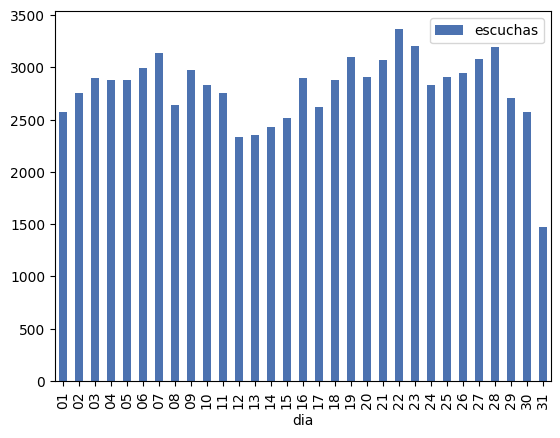

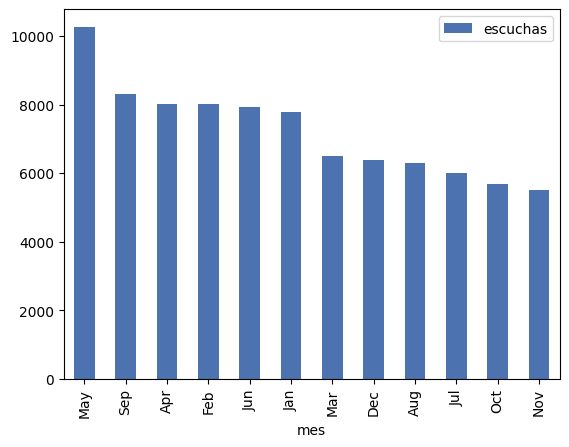

In [9]:
#COSAS CON LAS FECHAS DE LAS CANCIONES

fecha = df.iloc[:,3]
dia = df.iloc[:,3].str[0:2].value_counts()
mes = df.iloc[:,3].str[3:6].value_counts()
anio = df.iloc[:,3].str[7:11].value_counts()
hora = df.iloc[:,3].str[12:14].value_counts()

#IMPRIME HORAS
x = pd.DataFrame({'hora':hora.index, 'escuchas':hora.values}).sort_values('hora')
x.plot(kind='bar',x='hora',y='escuchas', grid=False)
plt.savefig('outputs/horas.jpg')
print(x)

#IMPRIME DIAS
x = pd.DataFrame({'dia':dia.index, 'escuchas':dia.values}).sort_values('dia')
x.plot(kind='bar',x='dia',y='escuchas', grid=False)
plt.savefig('outputs/dia.jpg')
print(x)

#IMPRIME MESES
x = pd.DataFrame({'mes':mes.index, 'escuchas':mes.values})
x.plot(kind='bar',x='mes',y='escuchas', grid=False)
plt.savefig('outputs/mes.jpg')
print(x)

In [12]:
#PRUEBA WEBSCRAP
webs = df.artista.value_counts(dropna=False).to_frame()
webs

,artista
Bad Religion,1915
Viva Belgrado,1882
No Use for a Name,1797
Weezer,1785
Lagwagon,1600
...,...
Common Rider,1
Die Skeptiker,1
GZA,1
Karl Neudert,1
